# CLASSIFICATION ANALYSIS ON YEARLY INCOME DATASET

<a id="dd"></a>
## 1. Problem Statement and Data Definition :

The objective of this project is to develop a predictive model to detect the presence or absence of heart disease in individuals based on a set of features. The dataset consists of the following features:

- **Age**: The age of the patient.
- **Sex**: The gender of the patient (0 = female, 1 = male).
- **ChestPainType**: The type of chest pain experienced by the patient (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic).
- **RestingBP**: The resting blood pressure of the patient (in mmHg).
- **Cholesterol**: The serum cholesterol level of the patient (in mg/dL).
- **FastingBS**: The fasting blood sugar level of the patient (0 = <= 120 mg/dL, 1 = > 120 mg/dL).
- **RestingECG**: The resting electrocardiographic results of the patient (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy).
- **MaxHR**: The maximum heart rate achieved by the patient.
- **ExerciseAngina**: Exercise-induced angina (0 = no, 1 = yes).
- **Oldpeak**: ST depression induced by exercise relative to rest.
- **ST_Slope**: The slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping).
- **HeartDisease**: The presence or absence of heart disease (0 = absence, 1 = presence).

Given the dataset, the goal is to build a machine learning model that can accurately predict the presence or absence of heart disease based on the available features. This model can be utilized to identify individuals who may be at risk of heart disease and enable timely intervention and treatment.

The problem can be approached as a binary classification task, where various machine learning algorithms can be employed, such as logistic regression, decision trees, random forests, or support vector machines, to build a predictive model. The model's performance can be evaluated using appropriate evaluation metrics, such as accuracy, precision, recall, and F1-score, to assess its ability to correctly classify individuals with or without heart disease.

The success of this project would be measured by developing a robust and accurate predictive model that can effectively identify individuals at risk of heart disease based on the given set of features.


### Tools Used:

**Python**,  **Numpy**,  **Pandas**,  **Scikit-learn**,  **Matplotlib**,  **Seaborn**, **Statsmodels**


<a id="il"></a>
## 2.Importing Libraries

In [321]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models and evaluation metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Statistical analysis
import statsmodels.api as sm

<a id="ed"></a>
## 4.Exploring the Dataset

**Problem:** What are the properties of data?

In [322]:
#Reading the file.
data=pd.read_csv('heart.csv')

#Previewing the files and columns of the dataset.
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [323]:
#Finding the shape of the dataset i.e. Number of rows and columns.
data.shape

(918, 12)

**Inference:** The dataset contains 918 rows and 12 columns, hence the rows and columns ratio is adequate. By exploring the data, we will validate our hypothesis about the contribution of the 12 factors to the contracting of heart disease by an individual.

In [324]:
#Further information about the datatypes, null values and total values present in the dataset.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


There are 7 Numeric columns and 5 categorical columns. Columns are not classified into correct datatype, there is a need to change them.

The columns FastingBS and HeartDisease are categorical columns which are already encoded, and therefore the machine identified them as numerical columns.

In [325]:
#changing datatypes of FastingBS and HeartDisease to 'object' for the purpose of descriptive statistics
data['FastingBS'] = data['FastingBS'].astype('object')
data['HeartDisease'] = data['HeartDisease'].astype('object')

In [326]:
#To know the properties of the data where the datatype is Categorical.
data.describe(include=object)

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope,HeartDisease
count,918,918,918,918,918,918,918
unique,2,4,2,3,2,3,2
top,M,ASY,0,Normal,N,Flat,1
freq,725,496,704,552,547,460,508


In [327]:
#To know the properties of Numeric columns.
data.describe()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364
std,9.432617,18.514154,109.384145,25.460334,1.066570
min,28.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,202.000000,6.200000


**Inference:** 


The data shows that the sample majorly consists of male and is between 28-77 years with an median age of 54 years. The means of RestingBP, Cholesterol, MaxHR and Oldpeak are 132.40, 198.80, 136.81 and 0.89 respectively.


The minimum values of RestingBP and Cholesterol are 0, which indicates the lack of integrity of those particular rows. Having them would mislead our predictions.

In [328]:
# removing rows which have zeroes for the columns 'RestingBP' and 'Cholesterol'
data = data.loc[(data['RestingBP'] != 0) & (data['Cholesterol'] != 0)]

In [329]:
# checking the shape of the data after removing the rows
data.shape

(746, 12)

<a id="hmv"></a>
### 5.Handling Missing values

In [330]:
#Checking null values
data.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

**Inference:** We can see that there are no null values present in the data.

<a id="ss"></a>
## 6.Statistical Summary

##### 1. Bivariate analysis of Numerical columns using Correlation.

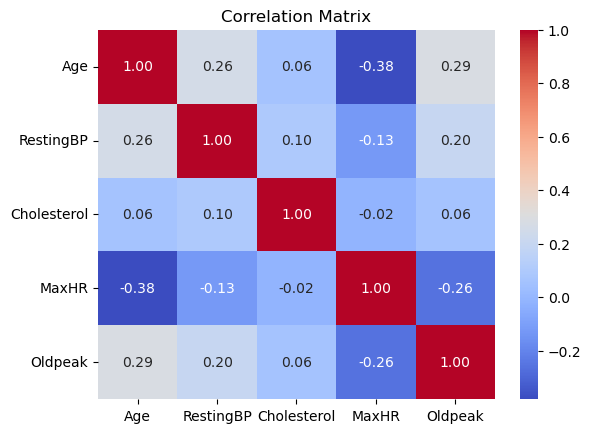

In [331]:
numeric_col = data.select_dtypes(include=np.number)

# Finding the correlation between the columns
correlation_matrix = numeric_col.corr()

# Create the correlation matrix plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix')

# Display the plot
plt.show()

**Inference:** Cannot find any significant correlation among the numeric independent features.

##### 2. Bivariate analysis for categorical columns.

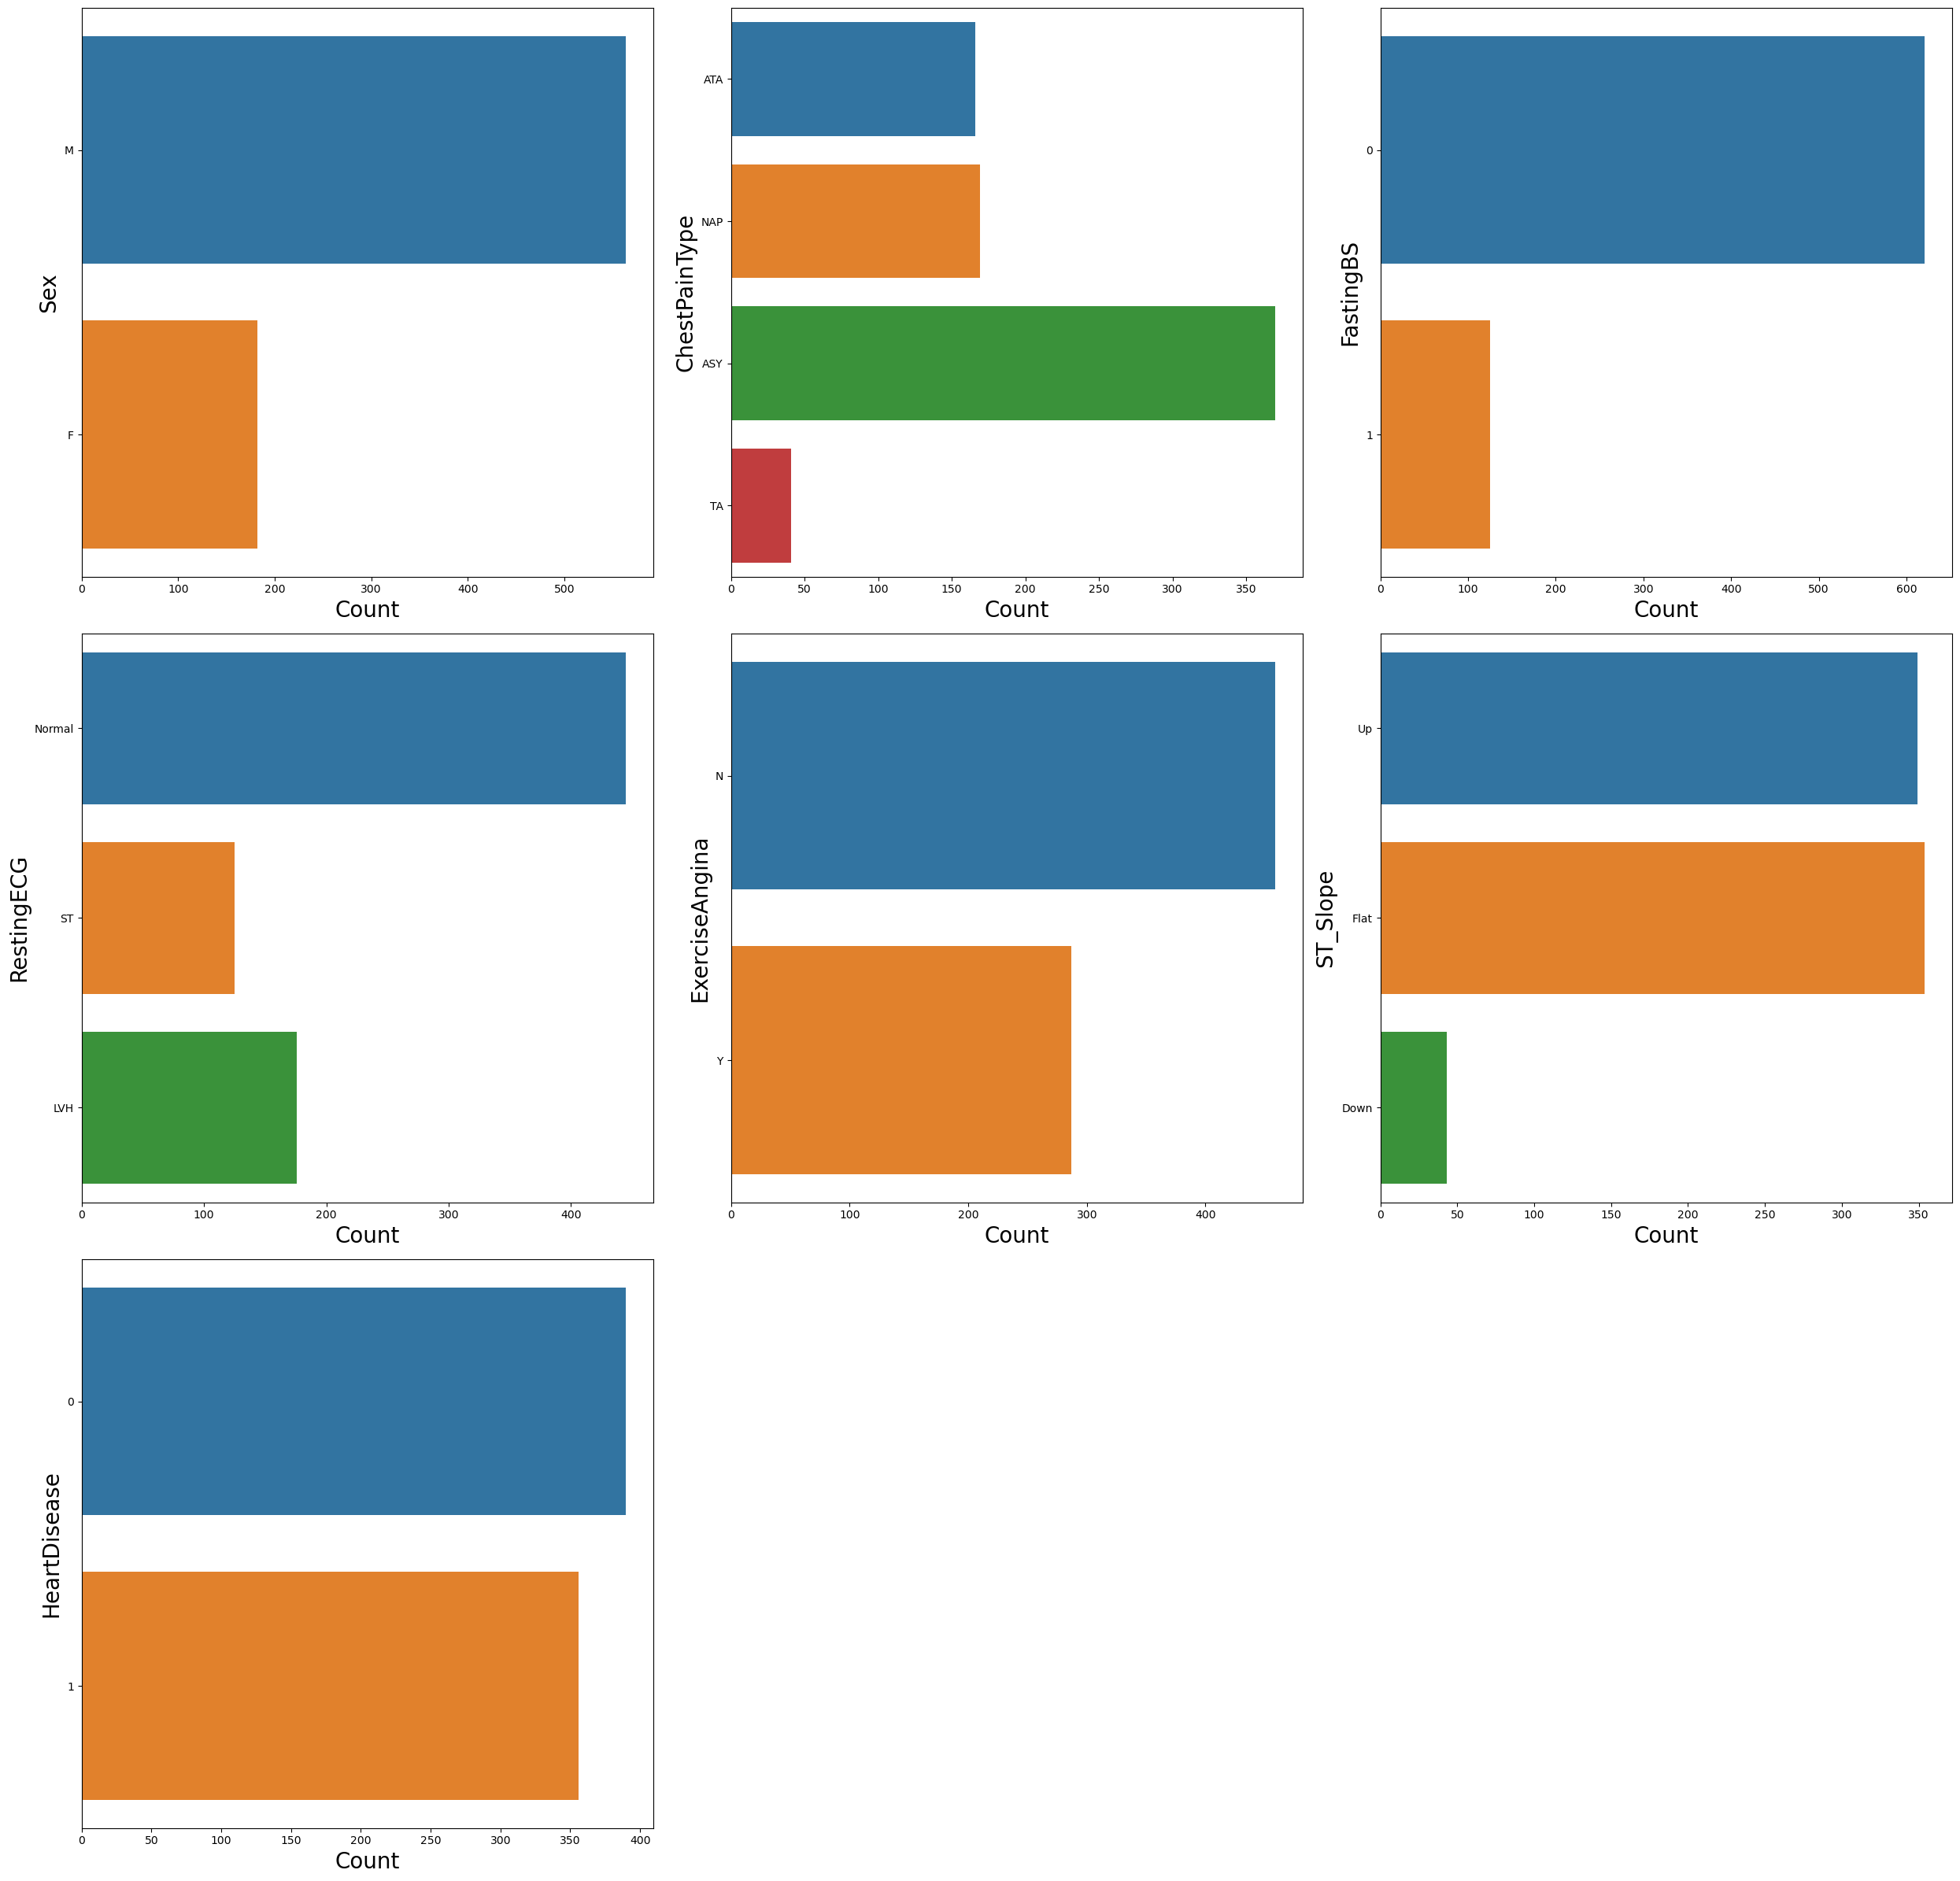

In [332]:
cat_cols = data.select_dtypes(include='object').columns

# Calculate the number of rows and columns for the subplot grid
num_rows = (len(cat_cols) - 1) // 3 + 1
num_cols = min(len(cat_cols), 3)

# Create the subplots with the determined grid size
fig, ax = plt.subplots(num_rows, num_cols, figsize=(25, num_rows * 8))

# Iterate through the categorical columns and plot the countplots
for i, col in enumerate(cat_cols):
    row = i // num_cols
    col = cat_cols[i]  # Use the column name instead of the index
    countplot = sns.countplot(y=data[col], ax=ax[row, i % num_cols])  # Adjusted index for the subplot grid
    countplot.set_ylabel(col, fontsize=20)  # Increase the font size
    countplot.set_xlabel("Count", fontsize=20)  # Increase the font size for x-label

# Remove any extra subplots
if len(cat_cols) < (num_rows * num_cols):
    for i in range(len(cat_cols), (num_rows * num_cols)):
        fig.delaxes(ax.flatten()[i])

plt.tight_layout()
plt.show()

Since, our target variable is **HeartDisease** therfore, we are more interested to see its relation with the features.

<a id="atf"></a>
## 7.Analyzing Relationship between Target and Features Columns.

#### 1. Distribution of Target variable in Data.

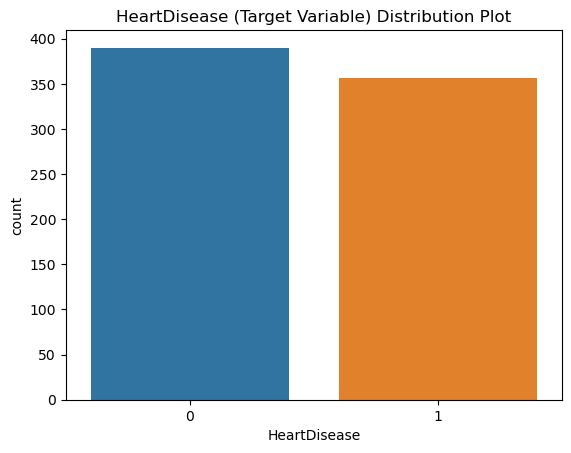

In [333]:
#Count of people earning more and less than $50,000 per year.
sns.countplot(data,x='HeartDisease')
plt.title('HeartDisease (Target Variable) Distribution Plot')
plt.ylabel('count')
plt.show()

#### 2. HeartDisease VS Age:

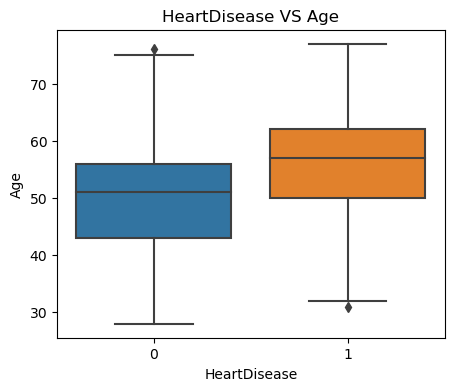

In [334]:
grp1=plt.figure(figsize=(5,4))
sns.boxplot(x='HeartDisease',y='Age',data=data)
plt.title('HeartDisease VS Age')
plt.show;

#### 3. HeartDisease VS RestingBP :

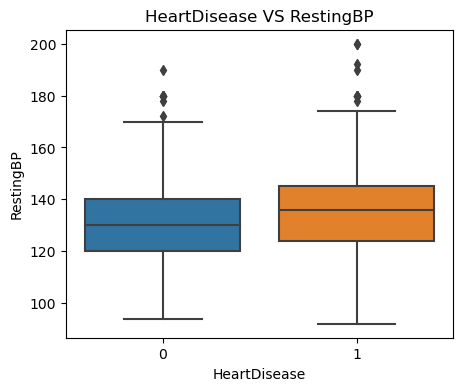

In [335]:
grp1=plt.figure(figsize=(5,4))
sns.boxplot(x='HeartDisease',y='RestingBP',data=data)
plt.title('HeartDisease VS RestingBP')
plt.show;

#### 4. HeartDisease VS Cholesterol:

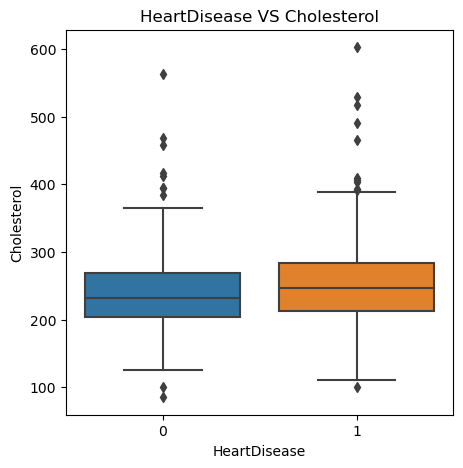

In [336]:
grp1=plt.figure(figsize=(5,5))
sns.boxplot(x='HeartDisease',y='Cholesterol',data=data)
plt.title('HeartDisease VS Cholesterol')
plt.show;

#### 5. HeartDisease VS MaxHR:

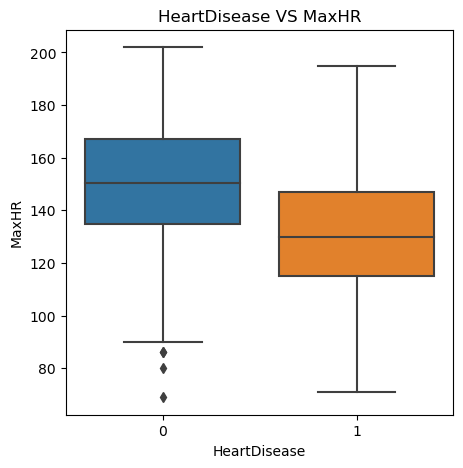

In [337]:
grp1=plt.figure(figsize=(5,5))
sns.boxplot(x='HeartDisease',y='MaxHR',data=data)
plt.title('HeartDisease VS MaxHR')
plt.show;

#### 6. HeartDisease VS Oldpeak:

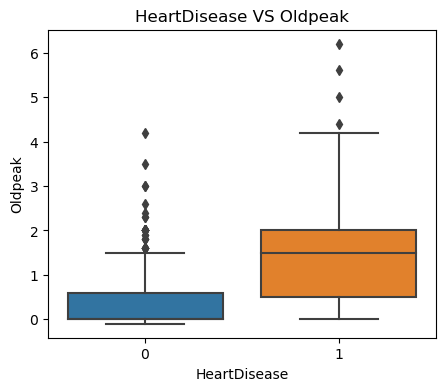

In [338]:
grp1=plt.figure(figsize=(5,4))
sns.boxplot(x='HeartDisease',y='Oldpeak',data=data)
plt.title('HeartDisease VS Oldpeak')
plt.show;

#### 7. HeartDisease VS Sex:

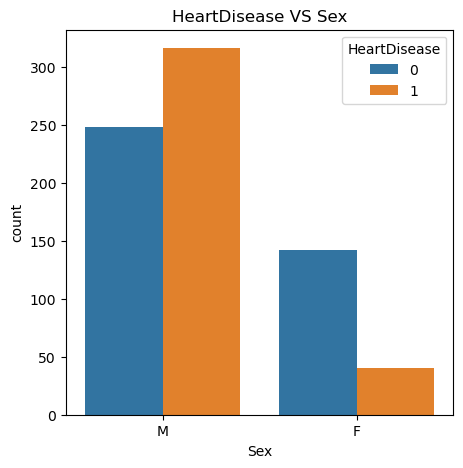

In [339]:
#Sex vs HeartDisease
grp2 = plt.figure(figsize=(5,5))
sns.countplot(x='Sex',hue='HeartDisease',data=data)
plt.title('HeartDisease VS Sex')
plt.show;

#### 8. HeartDisease VS ChestPainType:

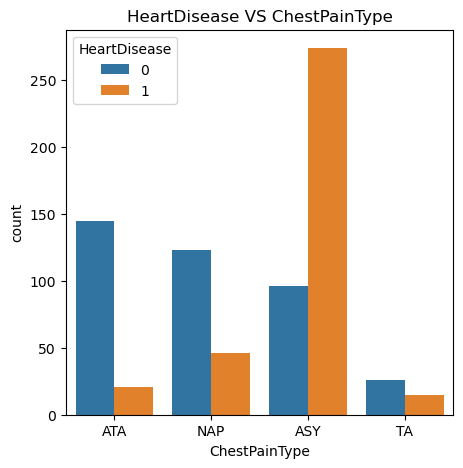

In [340]:
#ChestPainType vs HeartDisease
grp2 = plt.figure(figsize=(5,5))
sns.countplot(x='ChestPainType',hue='HeartDisease',data=data)
plt.title('HeartDisease VS ChestPainType')
plt.show;

#### 9. HeartDisease VS FastingBS:

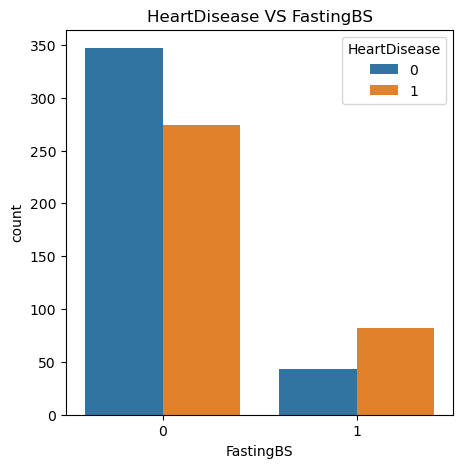

In [341]:
#FastingBS vs HeartDisease
grp2 = plt.figure(figsize=(5,5))
sns.countplot(x='FastingBS',hue='HeartDisease',data=data)
plt.title('HeartDisease VS FastingBS')
plt.show;

#### 10. HeartDisease VS RestingECG:

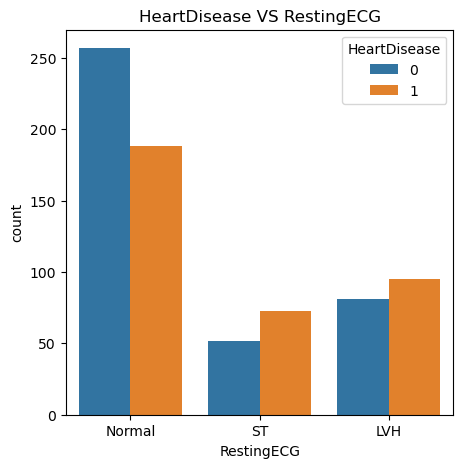

In [342]:
#RestingECG vs HeartDisease
grp2 = plt.figure(figsize=(5,5))
sns.countplot(x='RestingECG',hue='HeartDisease',data=data)
plt.title('HeartDisease VS RestingECG')
plt.show;

#### 11. HeartDisease VS ExerciseAngina:

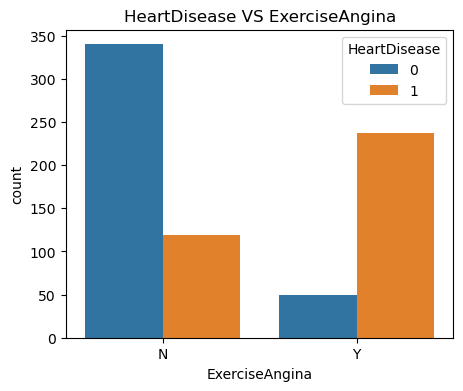

In [343]:
#ExerciseAngina vs HeartDisease
grp2 = plt.figure(figsize=(5,4))
sns.countplot(x='ExerciseAngina',hue='HeartDisease',data=data)
plt.title('HeartDisease VS ExerciseAngina')
plt.show;

#### 12. HeartDisease VS ST_Slope:

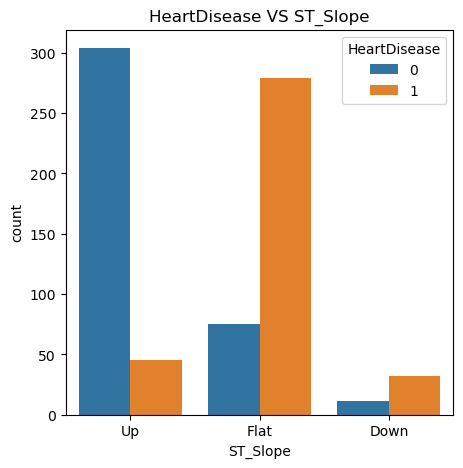

In [344]:
#ST_Slope vs HeartDisease
grp2 = plt.figure(figsize=(5,5))
sns.countplot(x='ST_Slope',hue='HeartDisease',data=data)
plt.title('HeartDisease VS ST_Slope')
plt.show;

<a id="ff"></a>
## 8.Feature Engineering

In [345]:
# Instantiation
labelencoder = LabelEncoder()

# Label encoding the categorical columns
data['Sex'] = labelencoder.fit_transform(data.Sex)
data['ChestPainType'] = labelencoder.fit_transform(data.ChestPainType)
data['RestingECG'] = labelencoder.fit_transform(data.RestingECG)
data['ExerciseAngina'] = labelencoder.fit_transform(data.ExerciseAngina)
data['ST_Slope'] = labelencoder.fit_transform(data.ST_Slope)

# Displaying head
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [346]:
# Changing the datatypes of FastingBS and HeartDisease to int64, for the purpose of medl fitting
data['FastingBS'] = data['FastingBS'].astype('int64')
data['HeartDisease'] = data['HeartDisease'].astype('int64')

In [347]:
# Splitting features and label 
X=data.iloc[:,0:11]
y=data.HeartDisease

In [348]:
# Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((596, 11), (596,), (150, 11), (150,))

# MODEL BUILDING

# 1. KNN Classifier

In [349]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [350]:
knn_train_pred = knn_model.predict(X_train)
knn_test_pred = knn_model.predict(X_test)

In [351]:
# check accuracy for train and test 
knn_train_accuracy=accuracy_score(y_train, knn_train_pred)
knn_test_accuracy=accuracy_score(y_test, knn_test_pred)
knn_train_accuracy,knn_test_accuracy

(0.7684563758389261, 0.6333333333333333)

In [352]:
# Calculate area under roc curve for train and test
from sklearn.metrics import roc_auc_score
knn_train_auc = roc_auc_score(y_train, knn_model.predict_proba(X_train)[:,1])
knn_test_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:,1])
knn_train_auc,knn_test_auc

(0.8446979956663054, 0.6819800569800569)

In [353]:
# check precision score for train and test 
knn_train_precision=precision_score(y_train, knn_train_pred)
knn_test_precision=precision_score(y_test, knn_test_pred)
knn_train_precision,knn_test_precision

(0.7607142857142857, 0.6307692307692307)

In [354]:
# check recall score for train and test 
knn_train_recall=recall_score(y_train, knn_train_pred)
knn_test_recall=recall_score(y_test, knn_test_pred)
knn_train_recall,knn_test_recall


(0.75, 0.5694444444444444)

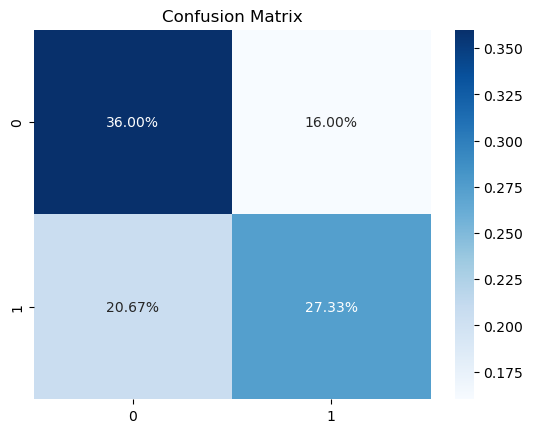

In [355]:
cf=confusion_matrix(y_test,knn_test_pred)
sns.heatmap((cf)/np.sum(cf),annot=True,  fmt='0.2%',cmap='Blues')
plt.title('Confusion Matrix')
plt.show;

# 2. Decision Tree

In [356]:
# Train Decision Tree model
dt_model = DecisionTreeClassifier(criterion='entropy',max_depth=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [357]:
# visualizing the decision tree
plt.figure(figsize=(14,10), dpi = 1000)
plot_tree(dt_model, feature_names=X.columns);

In [358]:
# Predicting train and test performances 
dt_train_pred = dt_model.predict(X_train)
dt_test_pred=dt_model.predict(X_test)

In [359]:
# check accuracy for train and test 
dt_test_accuracy=accuracy_score(y_test, dt_test_pred)
dt_train_accuracy=accuracy_score(y_train, dt_train_pred)
dt_test_accuracy,dt_train_accuracy

(0.86, 0.8875838926174496)

In [360]:
#check recall score  for train and test 
dt_train_recall=recall_score(y_train, dt_train_pred)
dt_test_recall=recall_score(y_test, dt_test_pred)
dt_train_recall,dt_test_recall

(0.8309859154929577, 0.8472222222222222)

In [361]:
#check precision for train and test 
dt_train_precision=precision_score(y_train, dt_train_pred)
dt_test_precision=precision_score(y_test, dt_test_pred)
dt_train_precision,dt_test_precision

(0.9254901960784314, 0.8591549295774648)

In [362]:
# Calculate area under roc curve for train and test
dt_train_auc = roc_auc_score(y_train, dt_model.predict_proba(X_train)[:,1])
dt_test_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1])
dt_train_auc,dt_test_auc

(0.9595296135789093, 0.8782941595441596)

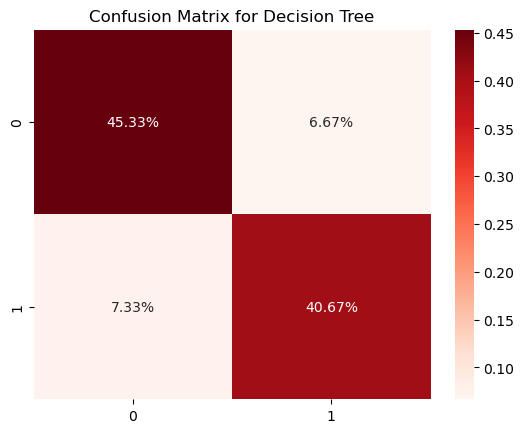

In [363]:
cf1=confusion_matrix(y_test,dt_test_pred)
sns.heatmap((cf1)/np.sum(cf1),annot=True,  fmt='0.2%',cmap='Reds')
plt.title('Confusion Matrix for Decision Tree')
plt.show;

# 3. Logistic Regression

In [364]:
# Train logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [365]:
#evaluate model performnance on train and test 
lr_train_pred = lr_model.predict(X_train)
lr_test_pred=lr_model.predict(X_test)

In [366]:
# check accuracy for train and test 
lr_train_accuracy=accuracy_score(y_train, lr_train_pred)
lr_test_accuracy=accuracy_score(y_test, lr_test_pred)
lr_train_accuracy,lr_test_accuracy

(0.8439597315436241, 0.88)

In [367]:
# check precision score for train and test 
lr_train_precision=precision_score(y_train, lr_train_pred)
lr_test_precision=precision_score(y_test, lr_test_pred)
lr_train_precision,lr_test_precision

(0.8374558303886925, 0.875)

In [368]:
# check recall score for train and test 
lr_train_recall=recall_score(y_train, lr_train_pred)
lr_test_recall=recall_score(y_test, lr_test_pred)
lr_train_recall,lr_test_recall


(0.8345070422535211, 0.875)

In [369]:
# Calculate area under roc curve for train and test
lr_train_auc = roc_auc_score(y_train, lr_model.predict_proba(X_train)[:,1])
lr_test_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:,1])
lr_train_auc,lr_test_auc

(0.9156848140122786, 0.9414173789173789)

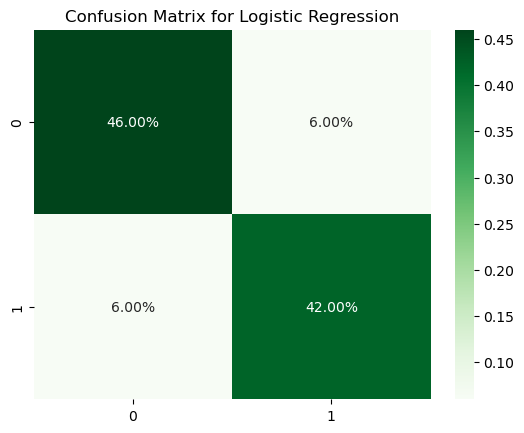

In [370]:
cf2=confusion_matrix(y_test,lr_test_pred)
sns.heatmap((cf2)/np.sum(cf2),annot=True,  fmt='0.2%',cmap='Greens')
plt.title('Confusion Matrix for Logistic Regression')
plt.show;

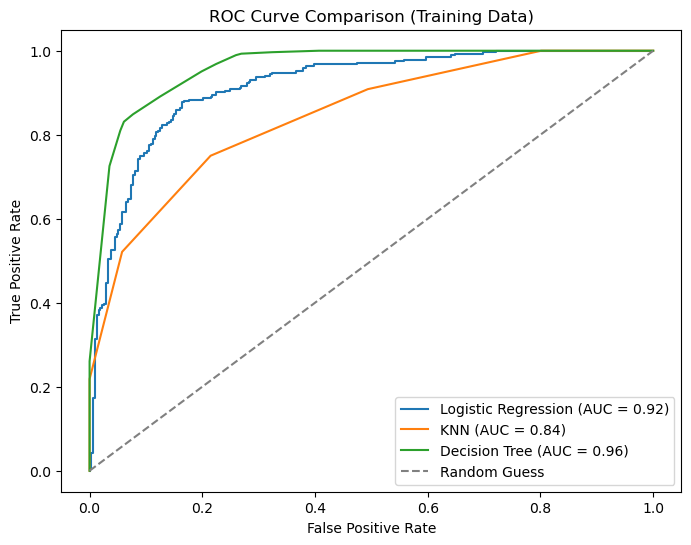

In [371]:
#ROC CURVE COMPARISON FOR TRAIN DATA 
plt.figure(figsize=(8,6))

# Logistic Regression
lr_train_fpr, lr_train_tpr, lr_train_thresholds = roc_curve(y_train, lr_model.predict_proba(X_train)[:,1])
lr_train_auc = roc_auc_score(y_train, lr_model.predict_proba(X_train)[:,1])
plt.plot(lr_train_fpr, lr_train_tpr, label=f'Logistic Regression (AUC = {lr_train_auc:.2f})')

# KNN
knn_train_fpr, knn_train_tpr, knn_train_thresholds = roc_curve(y_train, knn_model.predict_proba(X_train)[:,1])
knn_train_auc = roc_auc_score(y_train, knn_model.predict_proba(X_train)[:,1])
plt.plot(knn_train_fpr, knn_train_tpr, label=f'KNN (AUC = {knn_train_auc:.2f})')

# Decision Tree
dt_train_fpr, dt_train_tpr, dt_train_thresholds = roc_curve(y_train, dt_model.predict_proba(X_train)[:,1])
dt_train_auc = roc_auc_score(y_train, dt_model.predict_proba(X_train)[:,1])
plt.plot(dt_train_fpr, dt_train_tpr, label=f'Decision Tree (AUC = {dt_train_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Training Data)')
plt.legend()
plt.show()


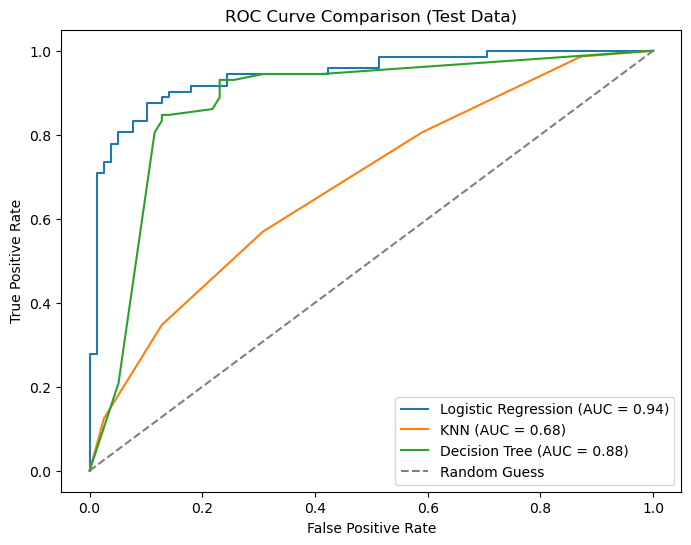

In [372]:
#ROC CURVE COMPARISON FOR TEST DATA
plt.figure(figsize=(8,6))

# Logistic Regression
lr_test_fpr, lr_test_tpr, lr_test_thresholds = roc_curve(y_test, lr_model.predict_proba(X_test)[:,1])
lr_test_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:,1])
plt.plot(lr_test_fpr, lr_test_tpr, label=f'Logistic Regression (AUC = {lr_test_auc:.2f})')

# KNN
knn_test_fpr, knn_test_tpr, knn_test_thresholds = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1])
knn_test_auc = roc_auc_score(y_test, knn_model.predict_proba(X_test)[:,1])
plt.plot(knn_test_fpr, knn_test_tpr, label=f'KNN (AUC = {knn_test_auc:.2f})')

# Decision Tree
dt_test_fpr, dt_test_tpr, dt_test_thresholds = roc_curve(y_test, dt_model.predict_proba(X_test)[:,1])
dt_test_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:,1])
plt.plot(dt_test_fpr, dt_test_tpr, label=f'Decision Tree (AUC = {dt_test_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Test Data)')
plt.legend()
plt.show()

In [373]:
# saving  performance metrics for each model in a dataframe 
summary_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree'],
    'Train Accuracy': [lr_train_accuracy,knn_train_accuracy,dt_train_accuracy],
    'Test Accuracy': [lr_test_accuracy,knn_test_accuracy,dt_test_accuracy],
    'Train Precision': [lr_train_precision,knn_train_precision,dt_train_precision],
    'Test Precision': [lr_test_precision,knn_test_precision,dt_test_precision],
    'Train Recall': [lr_train_recall,knn_train_recall,dt_train_recall],
    'Test Recall': [lr_test_recall,knn_test_recall,dt_test_recall],
    'Train AUC ROC': [lr_train_auc,knn_train_auc,dt_train_auc],
    'Test AUC ROC': [lr_test_auc,knn_test_auc,dt_test_auc]
                        })
summary_df

,Model,Train Accuracy,Test Accuracy,Train Precision,Test Precision,Train Recall,Test Recall,Train AUC ROC,Test AUC ROC
0,Logistic Regression,0.843960,0.880000,0.837456,0.875000,0.834507,0.875000,0.915685,0.941417
1,K-Nearest Neighbors,0.768456,0.633333,0.760714,0.630769,0.750000,0.569444,0.844698,0.681980
2,Decision Tree,0.887584,0.860000,0.925490,0.859155,0.830986,0.847222,0.959530,0.878294


## Interpretation of the Results:

**1. Logistic Regression:**

   - Train Accuracy: 0.843960
   - Test Accuracy: 0.880000
   - Train Precision: 0.837456
   - Test Precision: 0.875000
   - Train Recall: 0.834507
   - Test Recall: 0.875000
   - Train AUC ROC: 0.915685
   - Test AUC ROC: 0.941417
   
The logistic regression model achieves an accuracy of approximately 84.40% on the training set and 88.00% on the test set. It is a singular instance because the test accuracy ia greater than the train accuracy. It demonstrates a precision of 83.75% on the training data and 87.50% on the test data. The recall values are 83.45% for training and 87.50% for testing, indicating that the model is effective in identifying positive instances. The AUC ROC values of 91.57% for training and 94.14% for testing suggest that the model has good discriminative power.

**2. K-Nearest Neighbors:**

   - Train Accuracy: 0.768456
   - Test Accuracy: 0.633333
   - Train Precision: 0.760714
   - Test Precision: 0.630769
   - Train Recall: 0.750000
   - Test Recall: 0.569444
   - Train AUC ROC: 0.844698
   - Test AUC ROC: 0.681980
   
The K-Nearest Neighbors model achieves lower accuracy compared to logistic regression. It exhibits an accuracy of around 76.85% on the training set and 63.33% on the test set. The precision values are 76.07% for training and 63.08% for testing, indicating moderate performance in predicting positive instances. The recall values are 75.00% for training and 56.94% for testing, suggesting that the model is relatively successful in identifying positive instances. The AUC ROC values of 84.47% for training and 68.20% for testing indicate reasonable discriminative power.

**3. Decision Tree:**

   - Train Accuracy: 0.887584
   - Test Accuracy: 0.860000
   - Train Precision: 0.925490
   - Test Precision: 0.859155
   - Train Recall: 0.830986
   - Test Recall: 0.847222
   - Train AUC ROC: 0.959530
   - Test AUC ROC: 0.878294
   
The decision tree model achieves high accuracy on both the training set (88.76%) and the test set (86.00%). It exhibits precision values of 92.55% on the training data and 85.92% on the test data. The recall values are 83.10% for training and 84.72% for testing, indicating that the model is effective in identifying positive instances. The AUC ROC values of 95.95% for training and 87.83% for testing suggest that the model has excellent discriminative power.

In summary, the decision tree model performs best among the three models, achieving high accuracy, precision, recall, and AUC ROC scores on both the training and test sets. Logistic regression also performs well, while K-Nearest Neighbors demonstrates lower performance compared to the other two models. The decision tree model is recommended for its superior overall performance in predicting heart disease.

###  Attempt to improve KNN performance

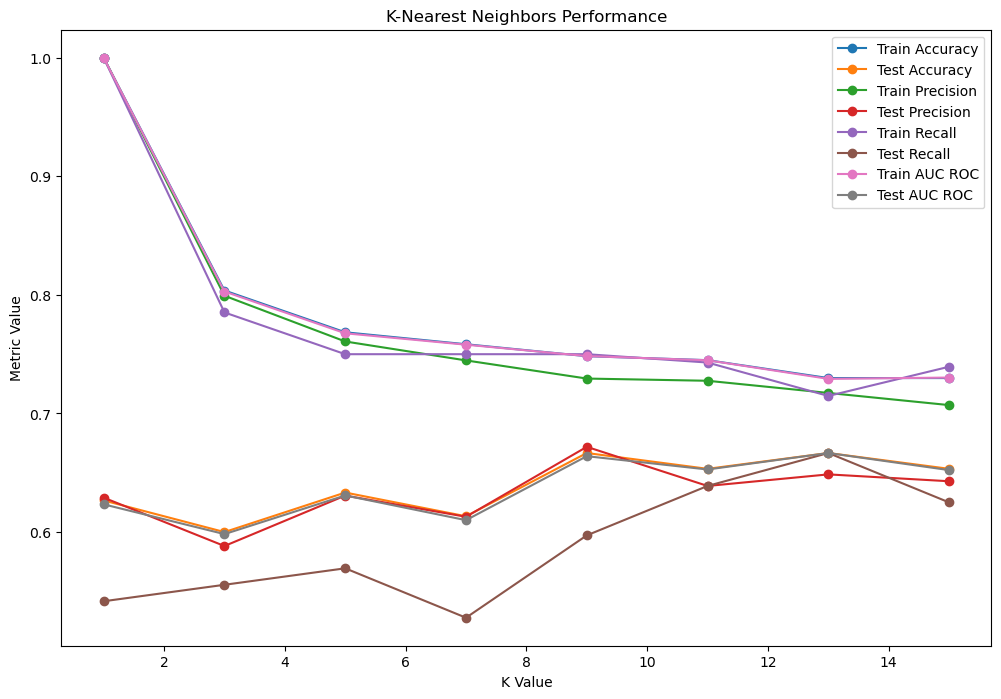

In [374]:
# Define the range of k values
k_values = [1, 3, 5, 7, 9, 11, 13, 15]

# Initialize lists to store the evaluation metrics
train_accuracy = []
test_accuracy = []
train_precision = []
test_precision = []
train_recall = []
test_recall = []
train_auc = []
test_auc = []

# Iterate over each k value
for k in k_values:
    # Create the K-Nearest Neighbors classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the classifier on the training data
    knn.fit(X_train, y_train)
    
    # Predict the target values for training and test data
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    
    # Calculate evaluation metrics
    train_accuracy.append(accuracy_score(y_train, train_pred))
    test_accuracy.append(accuracy_score(y_test, test_pred))
    train_precision.append(precision_score(y_train, train_pred))
    test_precision.append(precision_score(y_test, test_pred))
    train_recall.append(recall_score(y_train, train_pred))
    test_recall.append(recall_score(y_test, test_pred))
    train_auc.append(roc_auc_score(y_train, train_pred))
    test_auc.append(roc_auc_score(y_test, test_pred))

# Plot the evaluation metrics
plt.figure(figsize=(12, 8))
plt.plot(k_values, train_accuracy, marker='o', label='Train Accuracy')
plt.plot(k_values, test_accuracy, marker='o', label='Test Accuracy')
plt.plot(k_values, train_precision, marker='o', label='Train Precision')
plt.plot(k_values, test_precision, marker='o', label='Test Precision')
plt.plot(k_values, train_recall, marker='o', label='Train Recall')
plt.plot(k_values, test_recall, marker='o', label='Test Recall')
plt.plot(k_values, train_auc, marker='o', label='Train AUC ROC')
plt.plot(k_values, test_auc, marker='o', label='Test AUC ROC')
plt.xlabel('K Value')
plt.ylabel('Metric Value')
plt.title('K-Nearest Neighbors Performance')
plt.legend()
plt.show()


Depending upon the business domain and the context, we choose the appropriate value of 'k'.

## Attempt to improve Logistic performance

In [377]:

# Logistic Regression classifier with L1 regularization 
logreg = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)  

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the target variable for the training and test data
train_predictions = logreg.predict(X_train)
test_predictions = logreg.predict(X_test)

# Calculate accuracy for train and test data
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print the accuracy for train and test data
print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")
#Negilible increase.

Train Accuracy: 0.8456375838926175
Test Accuracy: 0.88


To further enhance the performance of the logistic regression model, L1 regularization was applied. L1 regularization introduces sparsity by encouraging some feature weights to be exactly zero, effectively performing feature selection. 

As we can observe, the test accuracy is more than the train accuracy, which does not happen usually, we can conclude that this a singular instance.

In conclusion, among the evaluated models, the decision tree demonstrated the best performance, achieving the highest test accuracy (86%) and AUC ROC (0.8782). However, the choice of the best model depends on various factors such as the specific problem, dataset characteristics, interpretability requirements, and other evaluation metrics. Further analysis and experimentation, including hyperparameter tuning and feature selection, can be performed to optimize the models' performance for the given task.
